In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:\\Users\\admin\\Desktop\\Startup\\File2_startup.csv")

In [3]:
data.head(10)

,Name,Valuation (B),Date,Country,City,Industry,Investors
0,Bytedance,140.0,04-07-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
2,SpaceX,74.0,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,Klarna,45.6,12-12-2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,40.0,01-08-2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
6,Databricks,38.0,02-05-2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
8,Nubank,30.0,03-01-2018,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V..."
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


# DATA INFO

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           848 non-null    object 
 1   Valuation (B)  848 non-null    float64
 2   Date           848 non-null    object 
 3   Country        848 non-null    object 
 4   City           833 non-null    object 
 5   Industry       848 non-null    object 
 6   Investors      847 non-null    object 
dtypes: float64(1), object(6)
memory usage: 46.5+ KB


# DIFFERENT COUNTRIES

In [5]:
data.Country.unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Singapore', 'Germany', 'Mexico',
       'Indonesia', 'Canada', 'Turkey', 'South Korea', 'Netherlands',
       'Colombia', 'Lithuania', 'Estonia', 'France', 'Austria', 'Ireland',
       'Israel', 'United Arab Emirates', 'Switzerland', 'Argentina',
       'Belgium', 'Japan', 'Luxembourg', 'Nigeria', 'Santa Clara',
       'Denmark', 'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Spain', 'Malaysia', 'Czech Republic', 'Philippines',
       'Finland', 'Croatia', 'United States,'], dtype=object)

# DIFFERENT INDUSTRIES

In [6]:
data.Industry.unique()

array(['Artificial intelligence', 'Fintech', 'Other',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Auto & transportation',
       'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Cybersecurity', 'Travel',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

# COUNTRYWISE STARTUP COUNT

In [7]:
data["Country"].value_counts()

United States           423
China                   165
India                    41
United Kingdom           33
Germany                  19
Israel                   18
France                   17
Canada                   16
Brazil                   13
Singapore                12
South Korea              11
Hong Kong                 7
Japan                     6
Australia                 6
Netherlands               5
Switzerland               4
Mexico                    4
Sweden                    4
Indonesia                 4
United Arab Emirates      3
Spain                     3
Ireland                   3
Belgium                   2
Colombia                  2
Thailand                  2
Norway                    2
Denmark                   2
Turkey                    2
South Africa              2
Austria                   2
United States,            1
Bermuda                   1
Senegal                   1
Croatia                   1
Philippines               1
Nigeria             

# INDUSTRY-WISE STARTUP COUNT

In [8]:
data["Industry"].value_counts()

Fintech                                167
Internet software & services           144
E-commerce & direct-to-consumer         89
Artificial intelligence                 69
Health                                  57
Other                                   50
Supply chain, logistics, & delivery     47
Mobile & telecommunications             36
Auto & transportation                   32
Cybersecurity                           32
Hardware                                30
Data management & analytics             29
Edtech                                  28
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  2
Name: Industry, dtype: int64

# PIE CHART INDICATING COUNTRY WISE COUNT

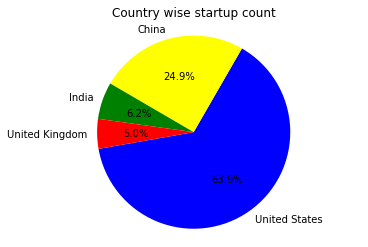

In [9]:
labels= ['United States', 'China', 'India', 'United Kingdom']

colors=['blue', 'yellow', 'green', 'red' ]

sizes= [423, 165, 41, 33]

plt.pie(sizes,labels=labels, colors=colors, startangle=190, autopct='%1.1f%%')
plt.title('Country wise startup count')

plt.axis('equal')

plt.show()

# PIE CHART INDICATING INDUSTRY WISE COUNT

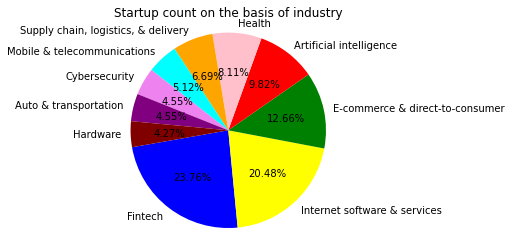

In [10]:
labels= ['Fintech', 'Internet software & services', 'E-commerce & direct-to-consumer', 'Artificial intelligence', 'Health',
        'Supply chain, logistics, & delivery', 'Mobile & telecommunications', 'Cybersecurity', 'Auto & transportation',
        'Hardware']

colors=['blue', 'yellow', 'green', 'red', 'pink', 'orange', 'cyan', 'violet', 'purple', 'maroon']

sizes= [167,144,89,69,57,47,36,32,32,30]

plt.pie(sizes,labels=labels, colors=colors, startangle=190, autopct='%2.2f%%')
plt.title('Startup count on the basis of industry')

plt.axis('equal')

plt.show()

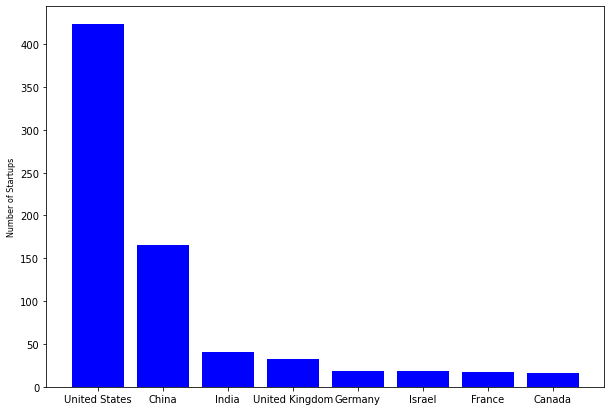

In [11]:
country = ['United States', 'China', 'India', 'United Kingdom','Germany', 'Israel', 'France', 'Canada']
average_fee = [423, 165, 41, 33, 19, 18, 17, 16]
fig = plt.figure(figsize =(10,7))
plt.bar(country, average_fee, color = 'b')
plt.ylabel('Number of Startups', fontsize = 8)
plt.show()

In [12]:
data_mapped = data.copy()
data_mapped["Industry"] = data_mapped["Industry"].map({"Fintech ":0, "Internet software & services":1,
                                                      "E-commerce & direct-to-consumer":2,
                                                      "Health":3,
                                                      "Artificial intelligence":4,
                                                      "Other":5,
                                                      "Supply chain, logistics, & delivery":6,
                                                      "Mobile & telecommunications":7,
                                                      "Cybersecurity":8,
                                                      "Auto & transportation":9,
                                                      "Hardware":10,
                                                      "Data management & analytics":11,
                                                      "Edtech":12,
                                                       "Consumer & retail":13,
                                                       "Travel":14})

In [13]:
data_mapped.head(10)

,Name,Valuation (B),Date,Country,City,Industry,Investors
0,Bytedance,140.0,04-07-2017,China,Beijing,4.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,Stripe,95.0,1/23/2014,United States,San Francisco,NaN,"Khosla Ventures, LowercaseCapital, capitalG"
2,SpaceX,74.0,12-01-2012,United States,Hawthorne,5.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,Klarna,45.6,12-12-2011,Sweden,Stockholm,NaN,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,40.0,01-08-2018,Australia,Surry Hills,1.0,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Instacart,39.0,12/30/2014,United States,San Francisco,6.0,"Khosla Ventures, Kleiner Perkins Caufield & By..."
6,Databricks,38.0,02-05-2019,United States,San Francisco,11.0,"Andreessen Horowitz, New Enterprise Associates..."
7,Revolut,33.0,4/26/2018,United Kingdom,London,NaN,"index Ventures, DST Global, Ribbit Capital"
8,Nubank,30.0,03-01-2018,Brazil,Sao Paulo,NaN,"Sequoia Capital, Redpoint e.ventures, Kaszek V..."
9,Epic Games,28.7,10/26/2018,United States,Cary,5.0,"Tencent Holdings, KKR, Smash Ventures"


In [14]:
data_mapped.dropna()

,Name,Valuation (B),Date,Country,City,Industry,Investors
0,Bytedance,140.0,04-07-2017,China,Beijing,4.0,"Sequoia Capital China, SIG Asia Investments, S..."
2,SpaceX,74.0,12-01-2012,United States,Hawthorne,5.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
4,Canva,40.0,01-08-2018,Australia,Surry Hills,1.0,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Instacart,39.0,12/30/2014,United States,San Francisco,6.0,"Khosla Ventures, Kleiner Perkins Caufield & By..."
6,Databricks,38.0,02-05-2019,United States,San Francisco,11.0,"Andreessen Horowitz, New Enterprise Associates..."
...,...,...,...,...,...,...,...
842,PandaDoc,1.0,9/22/2021,United States,San Francisco,1.0,"Rembrandt Venture Partners, M12, Altos Ventures"
843,Keenon Robotics,1.0,9/15/2021,China,Shanghai,6.0,"Yunqi Partners, SoftBank Group, iVision Ventures"
844,HAYDON,1.0,9/242021,China,Shanghai,13.0,"Tencent Holdings, Hillhouse Capital Management"
846,Vedantu,1.0,9/29/2021,India,Bengaluru,12.0,"Accel, Tiger Global Management, Omidyar Network"


# Valuation Based Industry Distribution

<AxesSubplot:xlabel='Industry', ylabel='Valuation (B)'>

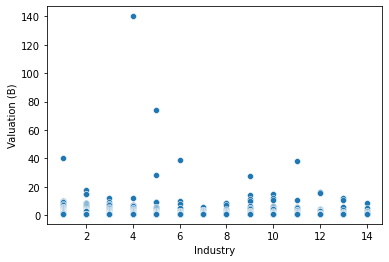

In [17]:
sns.scatterplot(x = data_mapped["Industry"], y = data_mapped["Valuation (B)"], alpha = 1)

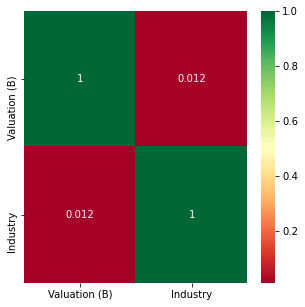

In [23]:
corrmat=data_mapped.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(data_mapped[top_corr_features].corr(),annot=True,cmap="RdYlGn")


<AxesSubplot:xlabel='Valuation (B)', ylabel='Density'>

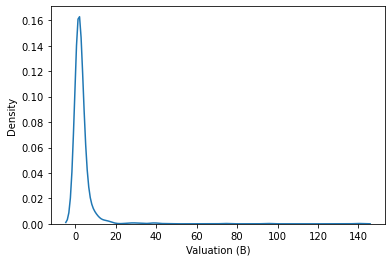

In [29]:
# Get just the KDE plot
sns.kdeplot(data['Valuation (B)'])

<AxesSubplot:xlabel='Industry', ylabel='Valuation (B)'>

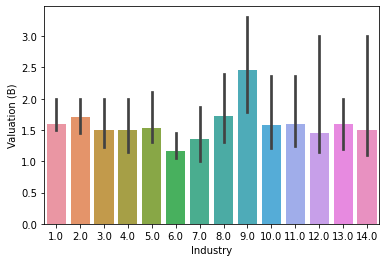

In [35]:
sns.barplot(x='Industry',y='Valuation (B)',data=data_mapped, estimator=np.median)